# Image Classification using sequential model

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD
from keras.layers.normalization import BatchNormalization

# Import the backend
from keras import backend as K

import os
print(os.listdir("fruitsdata"))

C:\Courses\SEM II\ML\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['Training', 'Trainingtemp', 'Validation', 'Validationtemp']


### Training Set

In [3]:
train_fruit_images = []
train_fruit_labels = [] 
for directory_path in glob.glob("fruitsdata/Training/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_fruit_images.append(img)
        train_fruit_labels.append(fruit_label)
train_fruit_images = np.array(train_fruit_images)
train_fruit_labels = np.array(train_fruit_labels)

In [4]:
label_to_id = {v:i for i,v in enumerate(np.unique(train_fruit_labels))}
id_to_label = {v: k for k, v in label_to_id.items()}

In [5]:
train_label_ids = np.array([label_to_id[x] for x in train_fruit_labels])

In [6]:
train_fruit_images.shape, train_label_ids.shape, train_fruit_labels.shape

((28736, 100, 100, 3), (28736,), (28736,))

### Test set images

In [7]:
test_fruit_images = []
test_fruit_labels = [] 
for directory_path in glob.glob("fruitsdata/Validation/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        
        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        
        test_fruit_images.append(img)
        test_fruit_labels.append(fruit_label)
test_fruit_images = np.array(test_fruit_images)
test_fruit_labels = np.array(test_fruit_labels)

In [8]:
test_label_ids = np.array([label_to_id[x] for x in test_fruit_labels])

In [9]:
test_fruit_images.shape, test_label_ids.shape

((9673, 100, 100, 3), (9673,))

### Data Splitting to train and test

In [11]:
Xtrain, Xtest = train_fruit_images, test_fruit_images
Ytrain, Ytest = train_label_ids, test_label_ids

Xtrain = Xtrain/255
Xtest = Xtest/255

#Make a flattened version for some of our models
Xflat_train = Xtrain.reshape(Xtrain.shape[0], 100*100*3)
Xflat_test = Xtest.reshape(Xtest.shape[0], 100*100*3)

#One Hot Encode the Output
Ytrain = keras.utils.to_categorical(Ytrain, 60)
Ytest = keras.utils.to_categorical(Ytest, 60)

print('Original Sizes:', Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
print('Flattened:', Xflat_train.shape, Xflat_test.shape)

Original Sizes: (28736, 100, 100, 3) (9673, 100, 100, 3) (28736, 60) (9673, 60)
Flattened: (28736, 30000) (9673, 30000)


In [12]:
print(Xtrain[1].shape)

(100, 100, 3)


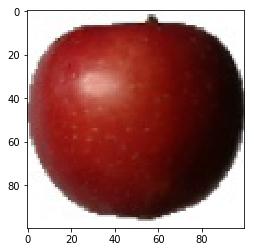

In [13]:
plt.imshow(Xtrain[1])

### Executing the model

In [14]:
first_model = Sequential()
first_model.add(Dense(100, activation='relu', input_shape=(Xflat_train.shape[1],)))
first_model.add(Dense(128, activation='relu'))
first_model.add(Dense(128, activation='relu'))
first_model.add(Dense(128, activation='relu'))
first_model.add(Dropout(0.05))
first_model.add(Dense(128, activation='relu'))
first_model.add(Dropout(0.05))
first_model.add(Dense(60, activation='softmax'))

first_model.summary()

first_model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_model = first_model.fit(Xflat_train, Ytrain,
                          batch_size=128,
                          epochs=10,
                          verbose=1,
                          validation_data=(Xflat_test, Ytest))
score = first_model.evaluate(Xflat_test, Ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3000100   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               12928     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

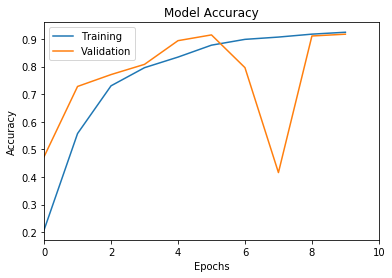

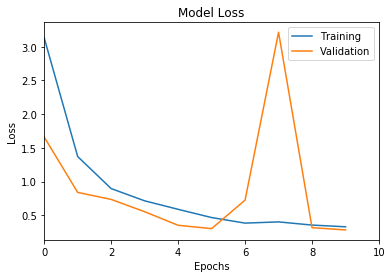

In [15]:
plt.plot(history_model.history['acc'])
plt.plot(history_model.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim((0, 10))
plt.legend(['Training', 'Validation'])
plt.show()

# Loss
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim((0, 10))
plt.legend(['Training', 'Validation'])
plt.show()